In [1]:
import cv2
import matplotlib.pyplot as plt 
import pickle 

In [2]:
import tensorflow
from tensorflow.keras.models import load_model
from numpy.random import randn
vgg = load_model('vgg.h5') 
vgg_svm=pickle.load(open("vgg_svm.sav",'rb'))

In [3]:
import cv2
import os
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from skimage.filters.rank import entropy 
from skimage.morphology import disk 
import glob 

import pickle 
from matplotlib import pyplot as plt 
h=128
w=128

In [4]:
def getred(img):
    ir=[]
    for i in range(h):
        for j in range(w):
            ir.append(img[i][j][0])
            #print(imgo[i][j],1)
    ir=np.array(ir)
    irr=np.reshape(ir,(h,w))
    irr.shape
    return irr
def getgreen(img):
  ig=[]
  for i in range(h):
      for j in range(w):
          ig.append(img[i][j][1])
          #print(imgo[i][j],2)
  ig=np.array(ig)
  igg=np.reshape(ig,(h,w))
  igg.shape
  return igg
def getblue(img):
  ib=[]
  for i in range(h):
      for j in range(w):
          ib.append(img[i][j][2])
          #print(imgo[i][j],3)
  ib=np.array(ib)
  ibb=np.reshape(ib,(h,w))
  ibb.shape  
  return ibb

In [5]:
import numpy as np
import cv2
import pandas as pd

def feature_extraction(img):
    df = pd.DataFrame()
    img2 = img.reshape(-1)
    df['Original Image'] = img2

    num = 1
    kernels = []
    for theta in range(2):
        theta = theta / 4. * np.pi
        for sigma in (1, 3):
            for lamda in np.arange(0, np.pi, np.pi / 4):
                for gamma in (0.05, 0.5):
                    gabor_label = 'Gabor' + str(num)
                    ksize=9
                    kernel = cv2.getGaborKernel((ksize, ksize), sigma, theta, lamda, gamma, 0, ktype=cv2.CV_32F)    
                    kernels.append(kernel)
                    fimg = cv2.filter2D(img2, cv2.CV_8UC3, kernel)
                    filtered_img = fimg.reshape(-1)
                    df[gabor_label] = filtered_img  
                    num += 1
    edges = cv2.Canny(img, 100,200)   
    edges1 = edges.reshape(-1)
    df['Canny Edge'] = edges1

    from skimage.filters import roberts, sobel, scharr, prewitt
    edge_roberts = roberts(img)
    edge_roberts1 = edge_roberts.reshape(-1)
    df['Roberts'] = edge_roberts1
    
    edge_sobel = sobel(img)
    edge_sobel1 = edge_sobel.reshape(-1)
    df['Sobel'] = edge_sobel1
    
    edge_scharr = scharr(img)
    edge_scharr1 = edge_scharr.reshape(-1)
    df['Scharr'] = edge_scharr1

    edge_prewitt = prewitt(img)
    edge_prewitt1 = edge_prewitt.reshape(-1)
    df['Prewitt'] = edge_prewitt1

    from scipy import ndimage as nd
    gaussian_img = nd.gaussian_filter(img, sigma=3)
    gaussian_img1 = gaussian_img.reshape(-1)
    df['Gaussian s3'] = gaussian_img1

    gaussian_img2 = nd.gaussian_filter(img, sigma=7)
    gaussian_img3 = gaussian_img2.reshape(-1)
    df['Gaussian s7'] = gaussian_img3

    median_img = nd.median_filter(img, size=3)
    median_img1 = median_img.reshape(-1)
    df['Median s3'] = median_img1

    variance_img = nd.generic_filter(img, np.var, size=3)
    variance_img1 = variance_img.reshape(-1)
    df['Variance s3'] = variance_img1  

    return df

In [6]:
# def displayfeatures(df):
#     ar=np.array(dfr['Gabor1'])
#     arr=dfr.columns
#     arr=np.array(arr)
#     temp=[]
#     for i in arr:
#         ar=np.array(dfr[i])
#         temp.append(ar)
#     return temp

# Binary segmentation

In [7]:
import pickle
model=pickle.load(open('binary_model','rb')) 

In [8]:
def binary_segmentation(img):
    img=getred(img)
    df = feature_extraction(img)
    pre=model.predict(df)
    s=pre.reshape((h,w))
    plt.imshow(s,cmap='gray')
    return s

# left lung

In [9]:
def left_lung(img,h,w,mid):
    sum_left=0
    for i in range(h):
        count=0
        for j in range(mid):
            if(img[i][j]>=200):
                count=count+1
        sum_left+=count
    return sum_left

# right lung

In [10]:
def right_lung(img,h,w,mid):
    mid1=mid+1
    end=w
    sum_right=0
    for i in range(h):
        count=0
        for j in range(mid1,end):
            if(img[i][j]>=200):
                count=count+1
        sum_right+=count
    return sum_right

# color segmentation

In [11]:
import pickle
model_r=pickle.load(open('rrcol_model','rb'))  

In [12]:
import pickle
model_g=pickle.load(open('gg_model','rb')) 

In [13]:
import pickle
model_b=pickle.load(open('bb_model','rb')) 

In [14]:
def imgr(img):
    img=getred(img)
    df = feature_extraction(img)
    pre_r=model_r.predict(df)   
    s_r=pre_r.reshape((h,w))
    plt.imshow(s_r)
    return pre_r

In [15]:
def imgg(img):
    img=getgreen(img)
    df = feature_extraction(img)
    pre_g=model_g.predict(df)   
    s_g=pre_g.reshape((h,w))
    plt.imshow(s_g)
    return pre_g

In [16]:
def imgb(img):
    img = getblue(img)
    df  = feature_extraction(img) 
    pre_b=model_b.predict(df)    
    s_b=pre_b.reshape((h,w)) 
    plt.imshow(s_b) 
    return pre_b 

In [17]:
def color_img(pre_r,pre_g,pre_b):
    q=[]
    for i in range(len(pre_b)):
      q.append(pre_r[i]) 
      q.append(pre_g[i])
      q.append(pre_b[i])
    q=np.array(q)
    print(len(q))
    qq=np.reshape(q,(h,w,3))
    plt.imshow(qq)
    return qq

In [18]:
#dfr.columns
#arr=np.array(dfr.columns)

# Risk

In [29]:
def tumor(result,a):
    c=-1
    if(result>=45):
        print("No tumors in "+a+" lung")
        c=0
    elif(result<45 and result>=40):
        print("Stage-1 tumors in "+a+" lung")
        c=1
    elif(result<40 and result>=25):
        print("Stage-2 tumors in "+a+" lung")
        c=2
    elif(result<25):
        print("Stage-3 tumors in "+a+" lung")
        c=3
    return c

In [30]:
def risk(tumor,pne):
    if(tumor==0):
        if(pne<30):
            print("Home Treatment")
        elif(pne>=30 and pne<60):
            print("Hospitalized")
            
        else:
            print("ICU")
    elif(tumor==1):
        if(pne<10):
            print("Home Treatment")
        elif(pne>=10 and pne<30):
            print("Hospitalized")
        else:
            print("ICU")
    elif(tumor==2):
        if(pne<30):
            print("Hospitalized")
        else:
            print("ICU")
    elif(tumor==3):
        print("ICU")

In [31]:
def degreeofrisk(tumor,pne):
    if(tumor==0):
        if(pne<30):
            print("If the patient tested positive he/she will be at LOW risk")
        elif(pne>=30 and pne<60):
            print("If the patient tested positive he/she will be at MEDIUM risk")
            
        else:
            print("If the patient tested positive he/she will be at HIGH risk")
    elif(tumor==1):
        if(pne<10):
            print("If the patient tested positive he/she will be at LOW risk")
        elif(pne>=10 and pne<30):
            print("If the patient tested positive he/she will be at MEDIUM risk")
        else:
            print("If the patient tested positive he/she will be at HIGH risk")
    elif(tumor==2):
        if(pne<30):
            print("If the patient tested positive he/she will be at MEDIUM risk")
        else:
            print("If the patient tested positive he/she will be at HIGH risk")
    elif(tumor==3):
        print("If the patient tested positive he/she will be at HIGH risk")

# Validation

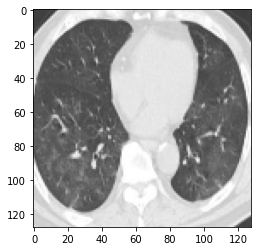

In [75]:
import numpy as np
d=[]
while True:
    img=cv2.imread(r"C:\Users\sudhakararao\Desktop\Project\divideddataset\pos_covid\covid_807.jpg")
    img=cv2.resize(img,(128,128))
    
    img1=img
    plt.imshow(img)
    d.append(img)  
    break
    
imgtest=img

# Prediction using vgg_svm

In [76]:
a=np.array(d)


In [77]:
f=vgg.predict(a)
f.shape

(1, 8192)

In [78]:
v1=pickle.load(open("vgg_svm.sav",'rb'))
var=v1.predict(f)
predictval=var[0]
predictval
if(predictval==1):
    print("Positive")
else:
    print("Negative")

Positive


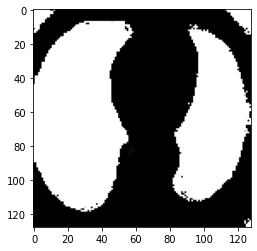

In [83]:
img = binary_segmentation(imgtest) 

In [84]:
mid=w//2+1
left=left_lung(img,h,w,mid)
right=right_lung(img,h,w,mid)
print(left,right) 

4888 3079


In [85]:
totalpix=mid*h
result=(left/totalpix)*100
print(result) 

58.75


In [86]:
totalpix1=(mid+1)*h
result1=(right/totalpix)*100
print(result1) 

37.00721153846154


In [87]:
c1=tumor(result,'left')
c2=tumor(result1,'right')

No tumors in left lung
Stage-2 tumors in right lung


In [88]:
ans=min(result,result1)
tumor(ans,'overall')
tumorstage=max(c1,c2)

Stage-2 tumors in overall lung


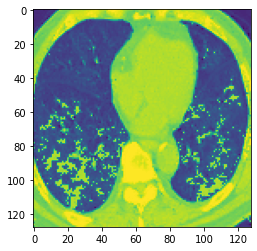

In [91]:
pre_r = imgr(imgtest)

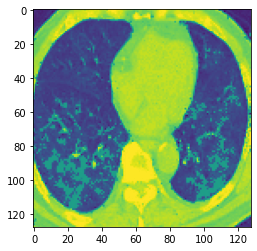

In [92]:
pre_g = imgg(imgtest)

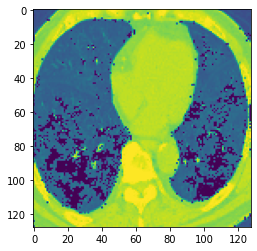

In [93]:
pre_b = imgb(imgtest)

49152


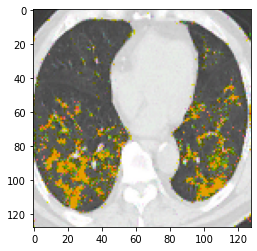

In [94]:
qq=color_img(pre_r,pre_g,pre_b)

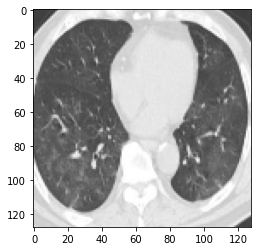

In [95]:
plt.imshow(img1)

In [96]:
img=pre_b.reshape((h,w))

In [97]:
summ=0
for i in range(h):
    count=0
    for j in range(w):
        if(img[i][j]>=0 and img[i][j]<=10):
            count=count+1
    summ+=count
summ

1587

In [98]:
total_pix=left+right
print(total_pix) 

7967


In [99]:
result=(summ/total_pix)*100
result

19.919668633111584

In [100]:
print(tumorstage,result)
risk(tumorstage,result)

2 19.919668633111584
Hospitalized


In [101]:
if predictval==1:
    print("Positive")
    tumor(ans,'overall')
    print("Pneumonia percentage:",result)
    risk(tumorstage,result)
else:
    print("The patient tested as Negative")
    tumor(ans,'overall')
    print("Pneumonia percentage:",result)
    degreeofrisk(tumorstage,result)

Positive
Stage-2 tumors in overall lung
Pneumonia percentage: 19.919668633111584
Hospitalized
